# **EPIC 3 - DATA PREPARATION**

![data-preparation](../docs/images/data-preparation.png)

## Objectives

- Pre-process the data for the machine learning model.

### Acceptance Criteria
- Datasets for each animal should have equal number of images to avoid bias.
- All images should be labelled, resized and normalized to a standard size (LO 3.1).

## Tasks
- Check and ensure similar number of images per animal.
- Resize and rename the images.

## Inputs

- inputs/[datasets]: folders containing the raw image datasets for each animal.

## Outputs

- An image dataset containing labelled animal images of a standard size and equal number of images for each animal.

---

# Change working directory

In [10]:
import os
current_dir = os.getcwd()
print("Current working directory is:", current_dir)

Current working directory is: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


In [2]:
os.chdir(os.path.dirname(current_dir)) # Change the current working directory to the parent directory
current_dir = os.getcwd() # Get the new current working directory
print("Changing the working directory to parent folder:", current_dir)

Changing the working directory to parent folder: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


# Manually add and remove images

Now visualize the dataset

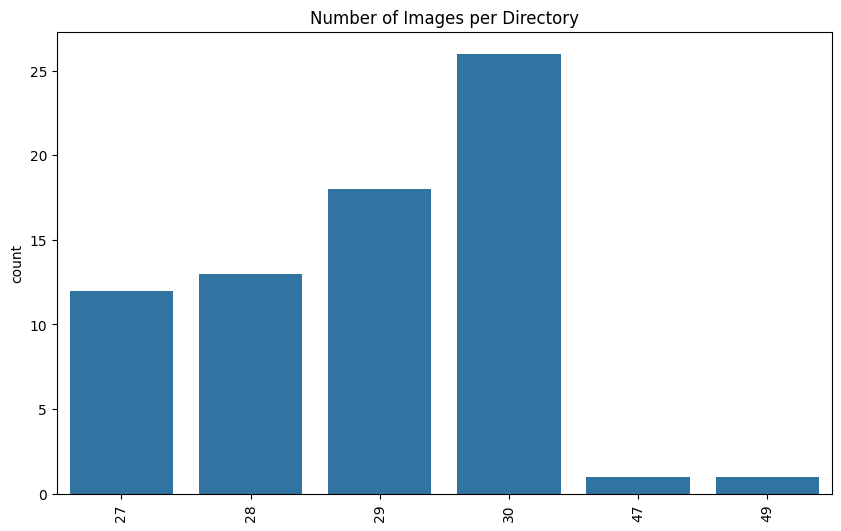

In [11]:
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

def visualize_dataset(directory):
    dir_counts = {}
    image_sizes = []
    image_resolutions = []
    for dirpath, dirnames, filenames in os.walk(directory):
        count = 0
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                count += 1
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_sizes.append(width * height)
                    image_resolutions.append((width, height))
        if count > 0:
            dir_counts[dirpath] = count

    # Plot number of images per directory
    plt.figure(figsize=(10, 6))
    sns.countplot(x=list(dir_counts.values()))
    plt.title('Number of Images per Directory')
    plt.xticks(rotation=90)
    plt.show()

visualize_dataset('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

In [7]:
def print_directories_in_range(directory, min_count, max_count):
    dir_counts = {}
    for dirpath, dirnames, filenames in os.walk(directory):
        count = 0
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                count += 1
        if count > 0:
            dir_counts[dirpath] = count

    # Print directories with image count within the specified range
    for dirpath, count in dir_counts.items():
        if min_count <= count <= max_count:
            print(f"Directory {dirpath} has {count} images")

print_directories_in_range('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset', 47, 49)


Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset/Labrador Retriever has 49 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset/Golden Retriever has 47 images


# Resize images

In [12]:
from PIL import Image, UnidentifiedImageError

def resize_images(directory, size=(150, 150)):
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg', '.JPG')):
                file_path = os.path.join(dirpath, filename)
                try:
                    with Image.open(file_path) as img:
                        img = img.convert('RGB')  # Convert image to RGB mode
                        new_img = img.resize(size)
                        new_img.save(file_path)
                except UnidentifiedImageError:
                    print(f"Skipping file (not an image or corrupted): {file_path}")

resize_images('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

/Users/gingermale/Documents/repos/PP5/pet-image-classifier/venv/lib/python3.8/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Images were checked to ensure they were all the same size.

In [9]:
def check_image_sizes(directory, size=(150, 150)):
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    if img.size != size:
                        print(f"Image {file_path} is not {size}, it's {img.size}")

check_image_sizes('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

# Conclusions and Next Steps

**Number of images per animal**

The datasets are now of consistent in size, with the majority having 30 images per animal. The minimum number of images per animal is 27. It is not envisaged that this discrepancy will cause any bias, but the future image augmentation step will seek to negate any bias.

**Labelling and resizing**

All images have been labelled uniquely as a means to identify them when they are split into train, validate and test datasets. The next step, [#5](https://github.com/alanjameschapman/pet-image-classifier/issues/5) is to split the datasets into train, validate and test datasets.